In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import chirp, find_peaks, peak_widths

sns.set_context('paper', font_scale=1.4)
sns.set_style('whitegrid')

## Functions for finding metrics

In [14]:
def find_peak_properties(x, prominence=0.05, rel_height=0.5):
    # find peaks and ignore any peaks that have low prominence
    peaks, _ = find_peaks(x, prominence=prominence)
    # find the widths of the peaks
    widths, _, left_coords, right_coords = peak_widths(x, peaks, rel_height=rel_height)

    # convert arrays to lists
    peaks = peaks.tolist()
    widths = widths.tolist()
    left_coords = left_coords.tolist()
    right_coords = right_coords.tolist()

    cluster_num = len(widths)

    # ignore any peaks that have a width > 0.25
    for i in range(cluster_num):
        if widths[i] > 20:
            widths[i] = np.NaN
            left_coords[i] = np.NaN
            right_coords[i] = np.NaN

    # find the peak heights
    peak_heights = x[peaks]

    spacings = []

    for i in range(len(left_coords)-1):
        spacings.append(left_coords[i+1] - right_coords[i])

    return peak_heights, widths, spacings

## Core model metrics (2D)

In [15]:
# import 6 distributions from different initial conditions
n_core_T2 = np.load('core/cell_distribution_200_45_t1.98.npy')
n_core_ex = np.load('core/cell_distribution_200_28_t1.98.npy')
n_core_ex1 = np.load('core/cell_distribution_100_ex1_t1.98.npy')
n_core_ex2 = np.load('core/cell_distribution_100_ex2_t1.98.npy')
n_core_ex3 = np.load('core/cell_distribution_100_ex3_t1.98.npy')
n_core_ex4 = np.load('core/cell_distribution_100_ex4_t1.98.npy')
n_core_ex5 = np.load('core/cell_distribution_100_ex5_t1.98.npy')

dist_list = [n_core_T2, n_core_ex, n_core_ex1, n_core_ex2, n_core_ex3, n_core_ex4, n_core_ex5]

In [16]:
all_widths = []
all_heights = []
all_spacings = []

for dist in dist_list:
    ny = dist.shape[0]
    # run over horizontal slices
    for i in np.linspace(0, ny-1, 10, dtype=int):
        heights, widths, spacings = find_peak_properties(dist[i, :])
        all_widths.append(widths)
        all_heights.append(heights)
        all_spacings.append(spacings)

    # run over vertical slices
    for j in np.linspace(0, ny-1, 10, dtype=int):
        heights, widths, spacings = find_peak_properties(dist[:, j])
        all_widths.append(widths)
        all_heights.append(heights)
        all_spacings.append(spacings)

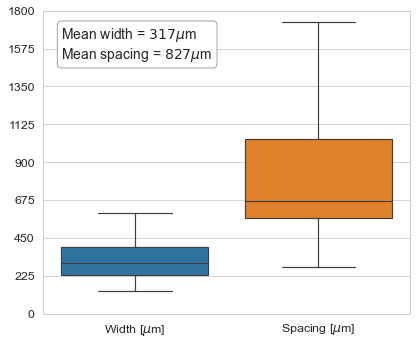

In [17]:
# flatten the lists
all_widths = [item for sublist in all_widths for item in sublist]
all_heights = [item for sublist in all_heights for item in sublist]
all_spacings = [item for sublist in all_spacings for item in sublist]

# make the lists the same length by adding nan values
all_widths = all_widths + [np.nan]*(len(all_heights) - len(all_widths))
all_spacings = all_spacings + [np.nan]*(len(all_heights) - len(all_spacings))

# make a dataframe of the data and fill it with nan values to make the data the same length
df = pd.DataFrame({'widths': all_widths, 'spacings': all_spacings})
df = df*30

# make a 3 column plot with a violin plot for widths, heights and spacings
plt.figure(figsize=(6, 5))

sns.boxplot(data=df, palette='tab10', showfliers=False)
#sns.violinplot(data=df, palette='tab10', inner='quartile')

mean_width = np.nanmean(all_widths)*30
mean_spacing = np.nanmean(all_spacings)*30
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

textstr = '\n'.join((
    r'Mean width = $%.0f \mu$m' % (mean_width, ),
    r'Mean spacing = $%.0f \mu$m' % (mean_spacing, )))

plt.text(-0.4, 1600, textstr, ha="left", va="center", size=14, bbox=bbox_props)

#plt.xlabel('Property')
#plt.ylabel(r'Value [$\mu$m]')
# make more y ticks
plt.yticks(np.linspace(0, 1800, 9))
plt.xticks([0, 1], [r'Width [$\mu$m]', r'Spacing [$\mu$m]'])
plt.ylim(0, 1800)
plt.tight_layout()
#plt.savefig('core_metrics_boxplot_2D.png', dpi=300, bbox_inches='tight')

# annotate the plot with the mean values
mean_width = np.nanmean(all_widths)
mean_height = np.nanmean(all_heights)
mean_spacing = np.nanmean(all_spacings)

#plt.annotate('Mean width = {:.2f}'.format(mean_width), xy=(0, mean_width), xytext=(0, mean_width+0.1))

core_widths = all_widths
core_spacings = all_spacings

In [18]:
#df_heights = pd.DataFrame({'Heights': all_heights})
#sns.boxplot(y='Heights', data=df_heights, showfliers=False)
#sns.violinplot(y='Heights', data=df_heights, inner='quartile')
#plt.xlabel('Maximum cell volume fraction')
#plt.ylabel('Volume fraction [-]')
#plt.tight_layout()

## Binding model metrics (2D)

In [19]:
# import 6 distributions from the binding simulations using different initial conditions
n_binding_T2 = np.load('binding/cell_distribution_200_45_t2.00.npy')
n_binding_ex3 = np.load('binding/cell_distribution_100_ex3_t2.00.npy')
n_binding_ex4 = np.load('binding/cell_distribution_100_ex4_t2.00.npy')
n_binding_ex5 = np.load('binding/cell_distribution_100_ex5_t2.00.npy')
n_binding_ex6 = np.load('binding/cell_distribution_100_ex6_t2.00.npy')
n_binding_ex7 = np.load('binding/cell_distribution_100_ex7_t2.00.npy')

dist_list = [n_binding_T2, n_binding_ex3, n_binding_ex4, n_binding_ex5, n_binding_ex6, n_binding_ex7]

In [20]:
all_widths = []
all_heights = []
all_spacings = []

for dist in dist_list:
    ny = dist.shape[0]
    # run over horizontal slices
    for i in np.linspace(0, ny-1, 10, dtype=int):
        heights, widths, spacings = find_peak_properties(dist[i, :])
        all_widths.append(widths)
        all_heights.append(heights)
        all_spacings.append(spacings)

    # run over vertical slices
    for j in np.linspace(0, ny-1, 10, dtype=int):
        heights, widths, spacings = find_peak_properties(dist[:, j])
        all_widths.append(widths)
        all_heights.append(heights)
        all_spacings.append(spacings)

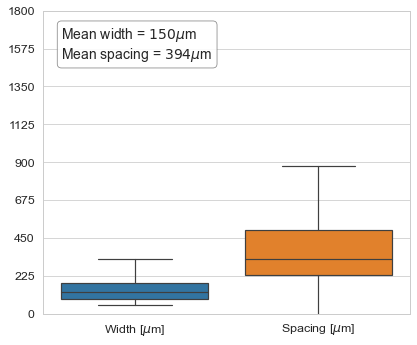

In [21]:
# flatten the lists
all_widths = [item for sublist in all_widths for item in sublist]
all_heights = [item for sublist in all_heights for item in sublist]
all_spacings = [item for sublist in all_spacings for item in sublist]

# make the lists the same length by adding nan values
all_widths = all_widths + [np.nan]*(len(all_heights) - len(all_widths))
all_spacings = all_spacings + [np.nan]*(len(all_heights) - len(all_spacings))

# make a dataframe of the data and fill it with nan values to make the data the same length
df = pd.DataFrame({'widths': all_widths, 'spacings': all_spacings})
df = df*30

# make a 3 column plot with a violin plot for widths, heights and spacings
plt.figure(figsize=(6, 5))

#sns.violinplot(data=df, palette='tab10')
sns.boxplot(data=df, palette='tab10', showfliers=False)
#plt.xlabel('Property')
#plt.ylabel(r'Value [$\mu$m]')
plt.xticks([0, 1], [r'Width [$\mu$m]', r'Spacing [$\mu$m]'])
plt.ylim(0, 1800)
# increase number of y ticks
plt.yticks(np.linspace(0, 1800, 9))

#make legend to show the mean values
mean_width = np.nanmean(all_widths)*30
mean_spacing = np.nanmean(all_spacings)*30
# make annotation in a box
#plt.annotate(r'Mean width = {:.0f} $\mu$m'.format(mean_width), xy=(0.75, 2800))
#plt.annotate(r'Mean spacing = {:.0f} $\mu$m'.format(mean_spacing), xy=(0.75, 2600))
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

textstr = '\n'.join((
    r'Mean width = $%.0f \mu$m' % (mean_width, ),
    r'Mean spacing = $%.0f \mu$m' % (mean_spacing, )))

plt.text(-0.4, 1600, textstr, ha="left", va="center", size=14, bbox=bbox_props)
#plt.text(0.75, 2500, r'Mean spacing = {:.0f} $\mu$m'.format(mean_spacing), ha="left", va="center", size=12, bbox=bbox_props)

plt.tight_layout()
#plt.savefig('binding_metrics_boxplot_2D.png', dpi=300, bbox_inches='tight')

# annotate the plot with the mean values
mean_width = np.nanmean(all_widths)
mean_height = np.nanmean(all_heights)
mean_spacing = np.nanmean(all_spacings)

#plt.annotate('Mean width = {:.2f}'.format(mean_width), xy=(0, mean_width), xytext=(0, mean_width+0.1))

binding_widths = all_widths
binding_spacings = all_spacings

In [22]:
#df_heights = pd.DataFrame({'Heights': all_heights})
#sns.boxplot(y='Heights', data=df_heights, showfliers=False)
#sns.violinplot(y='Heights', data=df_heights, inner='quartile')
#plt.xlabel('Maximum cell volume fraction')
#plt.ylabel('Volume fraction [-]')
#plt.tight_layout()


## check significance

In [23]:
# remove nan values from the lists
binding_widths = [x for x in binding_widths if str(x) != 'nan']
binding_spacings = [x for x in binding_spacings if str(x) != 'nan']
core_widths = [x for x in core_widths if str(x) != 'nan']
core_spacings = [x for x in core_spacings if str(x) != 'nan']

In [24]:
import scipy.stats as stats
# t-test for the widths
ttest_widths = stats.ttest_ind(binding_widths, core_widths)
print('t-test for widths: ', ttest_widths)

# t-test for the spacings
ttest_spacings = stats.ttest_ind(binding_spacings, core_spacings)
print('t-test for spacings: ', ttest_spacings)

t-test for widths:  Ttest_indResult(statistic=-22.891802736192652, pvalue=2.3382774464468635e-91)
t-test for spacings:  Ttest_indResult(statistic=-13.361457746249524, pvalue=4.489589937713411e-36)
